\* *Образец разобран самостоятельно по статье ["Градиентный спуск в Python" (Хабр)](https://habr.com/ru/post/547424/?ysclid=l8davoflfw829688954).*

<h1>Содержание<span class="tocSkip"></span></h1>
<br>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#1.-Постановка-задачи">
                    <span class="toc-item-num">1.&nbsp;&nbsp;</span>
                    Постановка задачи
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#2.-Реализация-алгоритма">
                    <span class="toc-item-num">2.&nbsp;&nbsp;</span>
                    Реализация алгоритма
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#2.1.-Константы">
                            <span class="toc-item-num">2.1.&nbsp;&nbsp;</span>
                            Константы
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#2.2.-Исполняемая-функция">
                            <span class="toc-item-num">2.2.&nbsp;&nbsp;</span>
                            Исполняемая функция
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#2.3.-Приращение-аргумента">
                            <span class="toc-item-num">2.3.&nbsp;&nbsp;</span>
                            Приращение аргумента
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#2.4.-Поворот-вектора">
                            <span class="toc-item-num">2.4.&nbsp;&nbsp;</span>
                            Поворот вектора
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#2.5.-Градиент">
                            <span class="toc-item-num">2.5.&nbsp;&nbsp;</span>
                            Градиент
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#2.6.-Локальный-минимум">
                            <span class="toc-item-num">2.6.&nbsp;&nbsp;</span>
                            Локальный минимум
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#2.7.-Градиентный спуск">
                            <span class="toc-item-num">2.7.&nbsp;&nbsp;</span>
                            Градиентный спуск
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#2.8.-Минимум-функции">
                            <span class="toc-item-num">2.8.&nbsp;&nbsp;</span>
                            Минимум функции
                        </a>
                    </span>
                </li>
            </ul>
        </li>
        <li>
            <span>
                <a href="#3.-Общий-вывод">
                    <span class="toc-item-num">3.&nbsp;&nbsp;</span>
                    Общий вывод
                </a>
            </span>
        </li>
    </ul>
</div>

# 1. Постановка задачи

**Задача:** создать алгоритм, который найдет максимальное значение по модулю минимума на заданном радиусе.

**Производительность:** алгоритм должен быть эффективным и работать достаточно быстро.

**Результат:** отобразить полученные результаты на графике.

**Принцип алгоритма** 

Рабочая область функции (заданный интервал) разбита на несколько точек. Выбраны точки локальных минимумов. После этого все координаты передаются функции в качестве аргументов и выбирается аргумент, дающий наименьшее значение. Затем применяется метод градиентного спуска.

<div style="height: 2px; background-color: blue; opacity: 0.5; margin: 10px 0;"></div>

# 2. Реализация алгоритма

Импорт необходимых библиотек:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

from plotting_functions import *            # module with functions to plot the graphs

Внутрипакетный модуль `plotting_functions` включает в себя следующие функции:

* `get_grid` - формирование сетки точек для построения графика
* `draw_chart` - построение графика

## 2.1. Константы

Задание констант:

In [2]:
RADIUS = 8                                  # working plane radius
GLOBAL_EPSILON = 0.000000001                # argument increment for derivative
CENTRE = (GLOBAL_EPSILON, GLOBAL_EPSILON)   # centre of the working circle
ARR_SHAPE = 100                             # number of points processed / ANGLE
ANGLE = 360                                 # angle to spread the points
STEP = RADIUS / ARR_SHAPE                   # step between two points

Значение константы `ARR_SHAPE` задано как `100`, поскольку при большем значении программа начнёт работать значительно медленнее, а при меньшем - испортит рассчёты.

## 2.2. Исполняемая фунция

Задание функции, вычисляющей результат исполняемой функции:

In [3]:
def executable_function(x: np.ndarray, y: np.ndarray) -> np.ndarray:
    """ Calculate result of a function.

    Args:
        x (np.ndarray): x coords
        y (np.ndarray): y coords

    Returns:
        np.ndarray: numerical function results
    """

    try:
        return np.sin(x) * np.exp((1 - np.cos(y)) ** 2) + \
               np.cos(y) * np.exp((1 - np.sin(x)) ** 2) + \
               (x - y) ** 2
    
    except:
        print('Убедитесь в корректности переданных аргументов')

## 2.3. Приращение аргумента

Известно, что **производной функции** в точке `x0` называется предел отношения приращения функции `Δy` к вызвавшему его приращению аргумента `Δx` в этой точке при `Δx → 0`.

Таким образом **приращению аргумента** функции соответствует следующая формула:

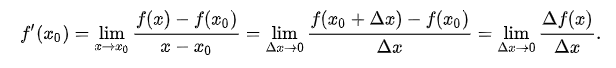

Поскольку предел аргумента стремится к нулю, точность должна быть небольшой по сравнению с радиусом рабочей плоскости, поэтому константе `GLOBAL_EPSILON` было задано крайне маленькое значение `0.000000001`.

## 2.4. Поворот вектора

Для дальнейшего разбиения плоскости необходимо произвести линейное преобразование двумерного векторного пространства, а именно **поворот вектора**, которое сохраняет длины преобразованных векторов.

\* *Теоретическая часть разобрана по статье ["Основы компьютерной геометрии. Написание простого 3D рендера (Хабр)"](https://habr.com/ru/post/520090/?ysclid=l8ecq8x3ui578442514).*

Если обозначить координаты исходного вектора за `{x, y}`, то координаты нового вектора, повернутого на угол `f`, можно обозначить за `{x' y'}`. Так как длина у этих векторов общая, вполне обоснованно использование понятий косинуса и синуса для выражения этих векторов через длину и угол относительно оси `OX`:

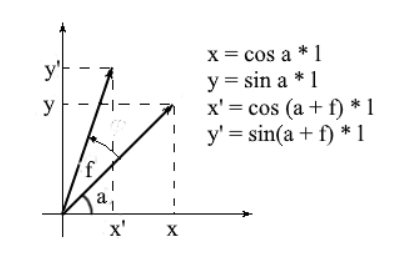

Значения `x'` и `y'` можно разложить по формулам косинуса и синуса суммы:

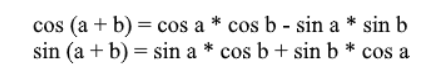

Результат координат повернутого вектора через формулы косинуса и синуса суммы:

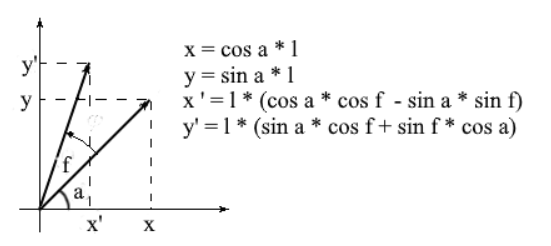

Поскольку множители `cos(a) * l` и `sin(a) * l` соответствуют координатам исходного вектора: `x = cos(a) * l`, `y = sin(a) * l`, необходимо произвести их замену на `x` и `y`, то есть выразить повернутый вектор через координаты исходного вектора и угол его поворота:

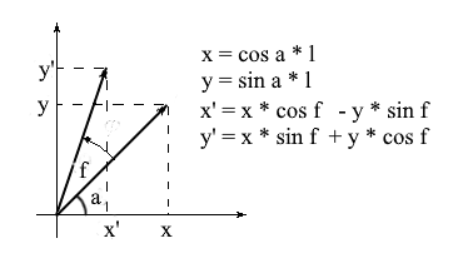

В виде матрицы это выражение выглядит следующим образом:

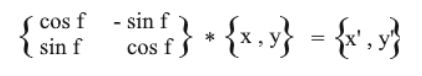

Таким образом в двумерном пространстве **повороту вектора** будет соответствовать седующая формула:

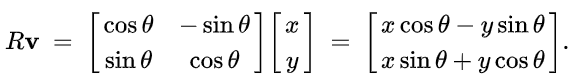

Задание функции, вычисляющей повёрнутый вектор, если вращение применяется к вектору `(x, 0)`:

In [4]:
def rotate_vector(length: float, a: int) -> Tuple:
    """ Rotate vector.

    Args:
        length (float): limit of values
        a (int): step to make between limits

    Returns:
        float: (x, y) values
    """
    
    try:
        return length * np.cos(a), length * np.sin(a)
    
    except:
        print('Убедитесь в корректности переданных аргументов')

## 2.5. Градиент

**Градиент** представляет собой производную по пространству, но в отличие от производной по одномерному времени, является не скаляром, а векторной величиной.

Формула рассчёта градиента будет выглядеть следующим образом:

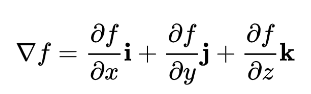

Поскольку градиент вычисляется для 2D-функции, `k = 0`:

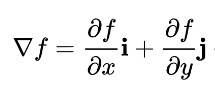

Задание функции, производящей расчёт производной по оси `Y`, где эпсилон - значение `y`:

In [5]:
def derivative_y(epsilon: float, arg: float) -> float:
    """ Calculate Y derivative.

    Args:
        epsilon (float): y value
        arg (float): x value

    Returns:
        float: Y derivative
    """
    
    try:
        return (executable_function(arg, epsilon + GLOBAL_EPSILON) - \
                executable_function(arg, epsilon)) / GLOBAL_EPSILON
    
    except:
        print('Убедитесь в корректности переданных аргументов')

Задание функции, производящей расчёт производной по оси `X`, где эпсилон - значение `x`:

In [6]:
def derivative_x(epsilon: float, arg: float) -> float:
    """ Calculate X derivative.

    Args:
        epsilon (float): x value
        arg (float): y value

    Returns:
        float: X derivative
    """
    
    try:
        return (executable_function(epsilon + GLOBAL_EPSILON, arg) - \
                executable_function(epsilon, arg)) / GLOBAL_EPSILON
    
    except:
        print('Убедитесь в корректности переданных аргументов')

Градиент будет представлять собой сумму результатов функций `derivative_x` и `derivative_y`, а возвращаемое значение - массив приблизительных локальных минимумов.

Схема генерации точек:

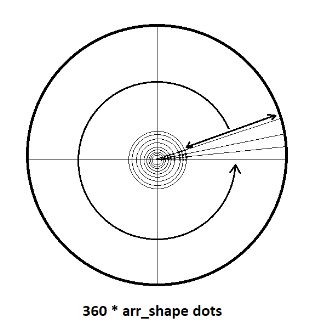

## 2.6. Локальный минимум

Известно, что под **экстремумом** в математике предполагается максимальное или минимальное значение функции на заданном множестве. 

Точка, в которой достигается экстремум, называется **точкой экстремума**. Соответственно, если достигается минимум - точка экстремума называется точкой минимума, а если максимум - точкой максимума. 

В математическом анализе выделяют понятие **локальный экстремум** (соответственно минимум или максимум).

\* *Теоретическая часть разобрана по статье [Экстремум](https://ru.wikipedia.org/wiki/Экстремум).*

Локальный минимум распознается по смене знака производной с минуса на плюс.

Задание функции, вычисляющей массив приблизительных локальных минимумов:

In [7]:
def calculate_flip_points() -> np.array:
    """ Calculate local minimums.

    Returns:
        np.array: local minimums
    """
    
    try:
        flip_points = np.array([0, 0])
        points = np.zeros((ANGLE, ARR_SHAPE), dtype=bool)
        cx, cy = CENTRE

        for i in range(ARR_SHAPE):
            for alpha in range(ANGLE):
                x, y = rotate_vector(STEP, alpha)
                x = x * i + cx
                y = y * i + cy
                points[alpha][i] = derivative_x(x, y) + derivative_y(y, x) > 0

                if not points[alpha][i-1] and points[alpha][i]:
                    flip_points = np.vstack((flip_points, np.array([alpha, i-1])))

        return flip_points
    
    except:
        print('Убедитесь в корректности переданных аргументов')

Задание функции, выбирающей минимальное из значений функции `flip_points`:

In [8]:
def pick_estimates(positions: np.array) -> Tuple:
    """ Calculate the best minimal local minimum.
    
    Args:
        positions (np.array): local minimums

    Returns:
        Tuple: best local (x, y) minimum
    """
    
    try:
        vx, vy = rotate_vector(STEP, positions[1][0])
        cx, cy = CENTRE
        best_x, best_y = cx + vx * positions[1][1], cy + vy * positions[1][1]

        for index in range(2, len(positions)):
            vx, vy = rotate_vector(STEP, positions[index][0])
            x, y = cx + vx * positions[index][1], cy + vy * positions[index][1]

            if executable_function(best_x, best_y) > executable_function(x, y):
                best_x = x
                best_y = y

        for index in range(ANGLE):
            vx, vy = rotate_vector(STEP, index)
            x, y = cx + vx * (ARR_SHAPE - 1), cy + vy * (ARR_SHAPE - 1)

            if executable_function(best_x, best_y) > executable_function(x, y):
                best_x = x
                best_y = y

        return best_x, best_y
    
    except:
        print('Убедитесь в корректности переданных аргументов')

## 2.7. Градиентный спуск

Задание функции, вычисляющей градиентный спуск:

In [9]:
def gradient_descent(best_estimates: Tuple, is_x: bool) -> Tuple:
    """ Calculate gradient descent.
    
    Args:
        best_estimates (Tuple): best local minimum
        is_x (bool): condition to change X, Y axes

    Returns:
        Tuple: best local (x, y) minimum
    """
    
    try:
        derivative = derivative_x if is_x else derivative_y

        best_x, best_y = best_estimates
        descent_step = STEP
        value = derivative(best_y, best_x)

        while abs(value) > GLOBAL_EPSILON:
            descent_step *= 0.95

            best_y = best_y - descent_step if derivative(best_y, best_x) > 0 else best_y + descent_step

            value = derivative(best_y, best_x)

        return best_y, best_x
    
    except:
        print('Убедитесь в корректности переданных аргументов')

## 2.8. Минимум функции

Сохранение координат точки минимума с помощью градиентного спуска:

In [10]:
min_x, min_y = gradient_descent(gradient_descent(pick_estimates(calculate_flip_points()), False), True)

Сохранение координат точки минимума:

In [11]:
minimum = (min_x, min_y, executable_function(min_x, min_y))

Построение графика функции:

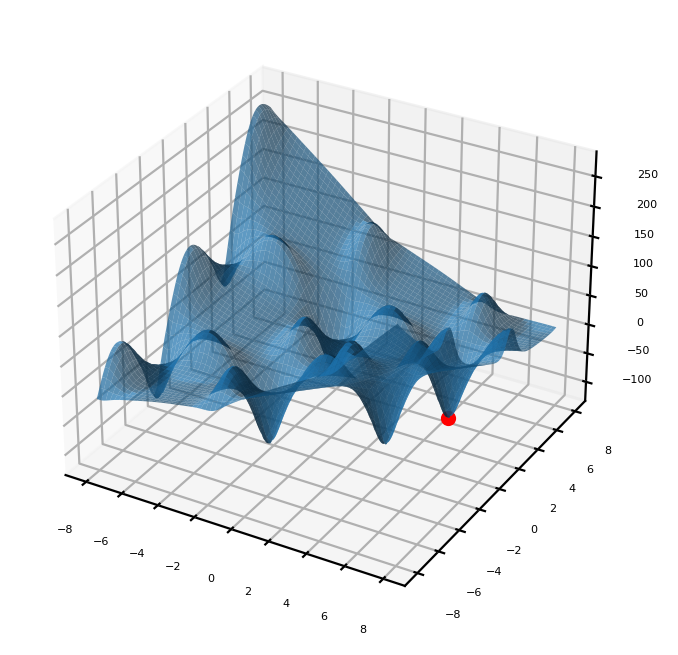

In [12]:
draw_chart(get_grid(RADIUS, 0.05, executable_function), minimum)

<div style="height: 2px; background-color: blue; opacity: 0.5; margin: 10px 0;"></div>

# 3. Общий вывод

Процесс вычисления минимального значения с помощью алгоритма может быть не очень точным при вычислениях в более крупном масштабе, например, если радиус рабочей плоскости равен 1000, но он очень быстрый по сравнению с точным. Плюс в любом случае, если радиус большой, результат находится примерно в том положении, в котором он должен быть, поэтому разница не будет заметна на графике.

<div style="text-align: center; font-size: 20px; padding: 15px 0;">
    <a href="#Содержание" data-toc-modified-id="Содержание" style="text-decoration: none; color: #296eaa; border: 2px dashed #296eaa; opacity: 0.8; border-radius: 3px; padding: 10px 80px;">
        Наверх к содержанию ↑
    </a>
</div>